 ## CH4 Spectra to do wavelength calibration and understand sensitvity tuning

**Theory:**  

$$ A_{\nu} = c \cdot K_{\nu}$$  
  
$$\tilde{c} =  c \cdot \frac{A_{\tilde{\nu}}}{A_{\nu}} \cdot \frac{K_{\nu}}{K_{\tilde{\nu}}}$$  
  
**Legend:**
 $$ A_{\nu} = Absorbance  \ at \ wavenumber \  \nu$$
 $$c = concentration \ in \  ppm*m$$
 $$ K_{\nu} = proportionality \ constant \ at \ wavenumber \ \nu$$

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path
import matplotlib
os.chdir('..')
from classes import Spectra, Observer, HiddenPrints

In [2]:
%%capture
#%% 1. create a spectrum
my_spectrum = Spectra(name = 'CH4_STP')

#%% 2. add an observer
my_spectrum.observer = Observer(unit  = 'wav',      #'wav' : wavenumer [1/cm] | 'lam' : wavelength [nm].
                                lower = 3066.95  , #lower =  3260.,    
                                upper = 3067.5, #upper =  3260.6,   
                                )
#%% 3. add gas_cells (may consist of multiple gasses) with gasses
# cell 0
my_spectrum.add_gas_cell(temperature    = 296,          # K. Default is 296
                         pressure       = 1,            # atm. Default is 1
                         length         = 100,           # cm. Default is 10
                         no_gasses      = 1)            # number of gasses. Default is 1

my_spectrum.gas_cells[-1].add_gas(gas_name  = "CH4",    # as in hitran
                                VMR        = 100E-6)    # E-6 = ppm 

# cell 1
my_spectrum.add_gas_cell(temperature    = 296,          # K. Default is 296
                         pressure       = 0.05,            # atm. Default is 1
                         length         = 2,           # cm. Default is 10
                         no_gasses      = 1)            # number of gasses. Default is 1
my_spectrum.gas_cells[-1].add_gas(gas_name  = "CH4",    # as in hitran
                                VMR        = 0.8E-2)    # E-6 = ppm 
#%% 4. download (running hapi functions)
my_spectrum.download(line_list = False,         # by setting to false, the linelist will nor be downloaded nor plotted.
                     step      = 0.001         # The step size determines the resolution of the graph. It is in the unit of wavenumbers (1/cm).
                    )  



To double check that everything is as desired, you can print a summary of your setup.

The plot function may be adjusted to ones needs.
If line list has not been downloaded (step 4), it will not be plotted.

Missing colon in file WindowsPath('C:/Users/i13500029/OneDrive - Endress+Hauser/Python/Figures_git/uni_layout_rc'), line 1 ('[halfsize]')
Missing colon in file WindowsPath('C:/Users/i13500029/OneDrive - Endress+Hauser/Python/Figures_git/uni_layout_rc'), line 47 ('[fullsize]')
Duplicate key in file WindowsPath('C:/Users/i13500029/OneDrive - Endress+Hauser/Python/Figures_git/uni_layout_rc'), line 51 ('figure.figsize:        \t5.708662653936627, \t4.281496990 \t')
Duplicate key in file WindowsPath('C:/Users/i13500029/OneDrive - Endress+Hauser/Python/Figures_git/uni_layout_rc'), line 67 ('axes.titlesize : 11')
Duplicate key in file WindowsPath('C:/Users/i13500029/OneDrive - Endress+Hauser/Python/Figures_git/uni_layout_rc'), line 68 ('axes.labelsize : 10')
Duplicate key in file WindowsPath('C:/Users/i13500029/OneDrive - Endress+Hauser/Python/Figures_git/uni_layout_rc'), line 69 ('svg.fonttype : none')
Duplicate key in file WindowsPath('C:/Users/i13500029/OneDrive - Endress+Hauser/Python/Fig

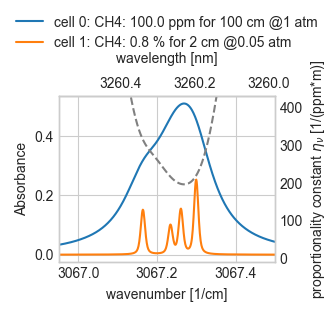

In [5]:
#%% 5. plot prop const
matplotlib.rc_file(Path('C:/Users/i13500029/OneDrive - Endress+Hauser/Python/Figures_git/uni_layout_rc'))

a = my_spectrum.plot(#figsize = (246/72, 246 *10/8 / 72),
                figsize = (246/72, 246 *8/8 / 72),
                 export = True,
                 fontsize = 10,
                 absorbance = True,
                 prop_const = True,
                )
#a.axvline(x=3260.15766, color = 'darkred') # fact 0.55
#a.axvline(x=3260.19, color = 'darkred') # fact 0.4
#a.axvline(x=3260.23, color = 'darkred') # fact 0.3

In [4]:
import numpy as np
#assumes wavelength as x units
cell = my_spectrum.gas_cells[0]
x = cell.lam
#y2 = cell.gasses[0].VMR * my_spectrum.gas_cells[0].length *1E4 / my_spectrum.gas_cells[0].absorbance
print(f'Absorbance | prop_const at 3260.23    nm (fact. 0.3) :  {np.interp(3260.23, x, cell.absorbance_lam)} | {np.interp(3260.23, x, cell.prop_const_lam)}')
print(f'Absorbance | prop_const at 3260.19    nm (fact. 0.4) :  {np.interp(3260.19, x, cell.absorbance_lam)} | {np.interp(3260.19, x, cell.prop_const_lam)}')
print(f'Absorbance | prop_const at 3260.19    nm (fact. 0.47) :  {np.interp(3260.175, x, cell.absorbance_lam)} | {np.interp(3260.175, x, cell.prop_const_lam)}')
print(f'Absorbance | prop_const at 3260.19    nm (fact. 0.5) :  {np.interp(3260.1686, x, cell.absorbance_lam)} | {np.interp(3260.1686, x, cell.prop_const_lam)}')
print(f'Absorbance | prop_const at 3260.15766 nm (fact. 0.55): {np.interp(3260.15766, x, cell.absorbance_lam)} | {np.interp(3260.15766, x, cell.prop_const_lam)}')
print(f'Absorbance | prop_const at 3260.15 nm (fact. 0.6) : {np.interp(3260.15, x, cell.absorbance_lam)} | {np.interp(3260.15, x, cell.prop_const_lam)}')


Absorbance | prop_const at 3260.23    nm (fact. 0.3) :  0.5101322657480768 | 196.0275927777345
Absorbance | prop_const at 3260.19    nm (fact. 0.4) :  0.43187229072892186 | 231.55193011591845
Absorbance | prop_const at 3260.19    nm (fact. 0.47) :  0.3678955144280633 | 271.8165717756053
Absorbance | prop_const at 3260.19    nm (fact. 0.5) :  0.339415603223799 | 294.6255582470967
Absorbance | prop_const at 3260.15766 nm (fact. 0.55): 0.29271160769008986 | 341.6495241483243
Absorbance | prop_const at 3260.15 nm (fact. 0.6) : 0.2627695028138908 | 380.5832623310181


**Example equations**  
At Factor 0.3, we measure $c$ ppm*m.  
What would we measure at factor 0.4 or 0.55?  
$$\tilde{c} =  c \cdot \frac{\tilde{A}}{A} \cdot \frac{K_{\nu}}{K_{\tilde{\nu}}}$$  

$$ c_{0.4}  = c \cdot \frac{0.432}{0.51} \cdot \frac{196.02}{231.556} = c \cdot 0.71684$$  
  
$$ c_{0.55} = c \cdot \frac{0.293}{0.51} \cdot \frac{196.02}{341.64} = c \cdot 0.32951$$  

**Idea**
Place a lookuptable for prop constant $K_{\nu}$ in camera, such I would always get correct concentration values and no need to translate

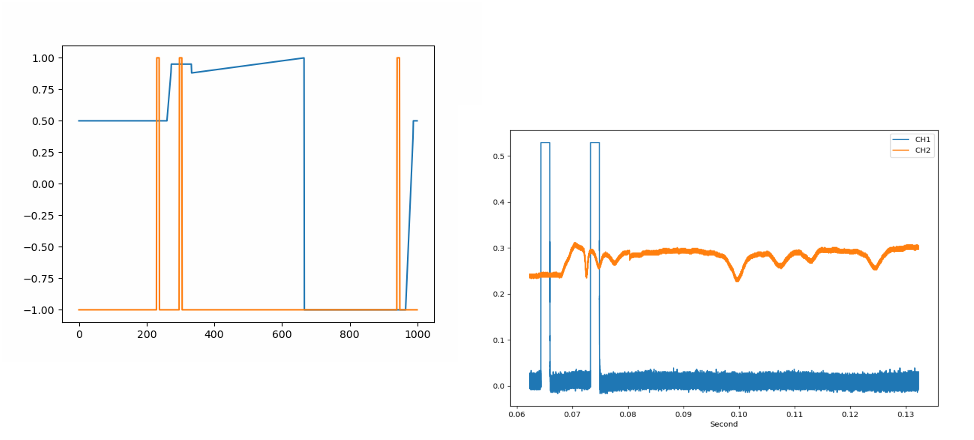